In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
!pip install requests beautifulsoup4 pandas nltk matplotlib wordcloud scikit-learn


In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways/"
pages = 100
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [ ]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,"✅ Trip Verified | Four very pleasant, on time..."
1,Not Verified | We travel extensively over 25...
2,✅ Trip Verified | Flight delayed an hour due ...
3,✅ Trip Verified | A very full flight made Pre...
4,✅ Trip Verified | The worst airline I’ve ever ...


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
import os
import pandas as pd

# Assuming df is your DataFrame
# df = ...

# Define the directory and file path within Colab
directory = 'data'
file_path = os.path.join(directory, 'BA_reviews.csv')

# Check if the directory exists, and create it if it doesn't
if not os.path.exists(directory):
    os.makedirs(directory)

# Save the DataFrame to a CSV file in the specified directory
df.to_csv(file_path, index=False)

print(f"File saved to {file_path}")


File saved to data/BA_reviews.csv


In [ ]:
from google.colab import files

files.download(file_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Import necessary libraries
import pandas as pd

# Load the data from the CSV file
df = pd.read_csv('data/BA_reviews.csv')

# Display the first few rows of the dataframe
print(df.head())

# Print the column names to identify the exact column containing the review text
print(df.columns)


                                             reviews
0  ✅ Trip Verified |  Four very pleasant, on time...
1  Not Verified |   We travel extensively over 25...
2  ✅ Trip Verified |  Flight delayed an hour due ...
3  ✅ Trip Verified |  A very full flight made Pre...
4  ✅ Trip Verified | The worst airline I’ve ever ...
Index(['reviews'], dtype='object')


In [ ]:
# Import necessary libraries for text cleaning
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Define a function to clean the text
def clean_text(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Join tokens back into string
    cleaned_text = ' '.join(tokens)
    return cleaned_text

# Assuming the column containing review text is named 'review', if it's named differently, replace 'review' with the correct column name
df['cleaned_review'] = df['reviews'].apply(clean_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Print the first few rows of the cleaned data
print(df[['reviews', 'cleaned_review']].head())


                                             reviews  \
0  ✅ Trip Verified |  Four very pleasant, on time...   
1  Not Verified |   We travel extensively over 25...   
2  ✅ Trip Verified |  Flight delayed an hour due ...   
3  ✅ Trip Verified |  A very full flight made Pre...   
4  ✅ Trip Verified | The worst airline I’ve ever ...   

                                      cleaned_review  
0  trip verified four pleasant time flights frien...  
1  verified travel extensively years tend use ba ...  
2  trip verified flight delayed hour due bad weat...  
3  trip verified full flight made premium economy...  
4  trip verified worst airline ive ever flown cou...  


In [ ]:
!pip install gensim pyLDAvis


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 18.4 MB/s eta 0:00:00


In [ ]:
import gensim
from gensim import corpora
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

# Tokenize and create dictionary
tokenized_reviews = df['cleaned_review'].apply(lambda x: x.split())
dictionary = corpora.Dictionary(tokenized_reviews)

# Create a corpus
corpus = [dictionary.doc2bow(text) for text in tokenized_reviews]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Print the topics
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

# Visualize the topics
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)


(0, '0.018*"british" + 0.017*"airways" + 0.014*"food" + 0.014*"service" + 0.013*"flight"')
(1, '0.018*"flight" + 0.014*"ba" + 0.013*"good" + 0.012*"crew" + 0.011*"food"')
(2, '0.025*"flight" + 0.019*"ba" + 0.010*"seat" + 0.009*"verified" + 0.008*"airways"')
(3, '0.029*"flight" + 0.015*"ba" + 0.010*"us" + 0.009*"hours" + 0.008*"told"')
(4, '0.028*"class" + 0.026*"business" + 0.019*"seats" + 0.014*"seat" + 0.013*"ba"')


In [ ]:
!pip install textblob



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                                      cleaned_review  sentiment
0  trip verified four pleasant time flights frien...   0.253571
1  verified travel extensively years tend use ba ...   0.096080
2  trip verified flight delayed hour due bad weat...  -0.081000
3  trip verified full flight made premium economy...   0.115417
4  trip verified worst airline ive ever flown cou...  -0.107813


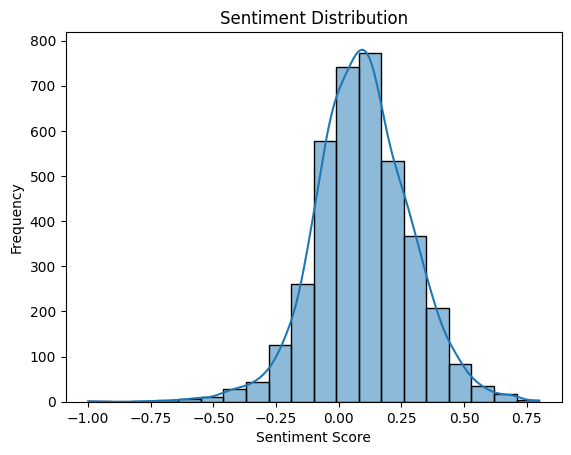

In [ ]:
from textblob import TextBlob

# Function to get sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply sentiment analysis
df['sentiment'] = df['cleaned_review'].apply(get_sentiment)

# Display the sentiment scores
print(df[['cleaned_review', 'sentiment']].head())

# Plot sentiment distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['sentiment'], bins=20, kde=True)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


In [ ]:
!pip install wordcloud


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


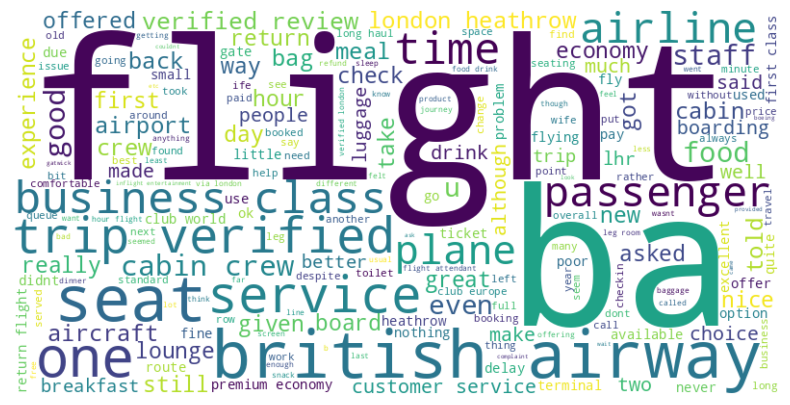

In [ ]:
from wordcloud import WordCloud

# Combine all reviews into one string
all_reviews = ' '.join(df['cleaned_review'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
!pip install python-pptx

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 16.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer  # For handling missing values
from sklearn.preprocessing import OneHotEncoder  # For encoding categorical features
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data = pd.read_csv("D:\SURYA S")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:1: DeprecationWarning: invalid escape sequence '\S'
<>:1: DeprecationWarning: invalid escape sequence '\S'
<ipython-input-36-d5dc871b422d>:1: DeprecationWarning: invalid escape sequence '\S'
  data = pd.read_csv("D:\SURYA S")


FileNotFoundError: [Errno 2] No such file or directory: 'D:\\SURYA S'

In [ ]:
# Import necessary libraries
import pandas as pd

# Load the data from the CSV file
df1 = pd.read_csv('customer_booking.csv')

# Display the first few rows of the dataframe
print(df.head())

# Print the column names to identify the exact column containing the review text
print(df.columns)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


FileNotFoundError: [Errno 2] No such file or directory: 'customer_booking.csv'